In [1]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

pd.set_option('display.max_colwidth', 355)
pd.set_option('display.max_rows', 100)

In [2]:
#df = pd.read_csv('datasets/b3_stocks_1994_2020.csv')
df = pd.read_csv('../b3data/b3_stocks_1994_2020.csv')

### IBOV Ações - Exploração inicial

In [3]:
df.head()

,datetime,ticker,open,close,high,low,volume
0,1994-07-04,ACE 3,48.00,48.00,48.00,47.00,46550.0
1,1994-07-04,ALP 3,155.27,156.00,156.00,155.27,163405.8
2,1994-07-04,ALP 4,131.00,131.00,131.00,131.00,6550.0
3,1994-07-04,IBP 6,600.00,600.00,600.00,600.00,7800.0
4,1994-07-04,AQT 4,0.89,0.99,0.99,0.85,13137.0


In [4]:
df.shape

(1883203, 7)

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df['delta_open'] = df.apply(lambda x: (abs(x['open'] - x['close']) / x['open']) * 100, axis=1)

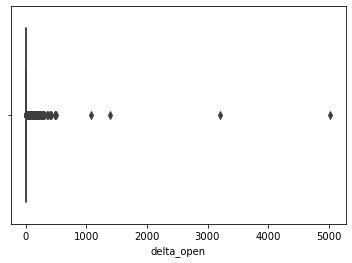

In [7]:
sns.boxplot(x=df['delta_open'])

In [12]:
df['delta_high'] = df.apply(lambda x: (abs(x['high'] - x['close'])), axis=1)

In [13]:
df.head()

,datetime,ticker,open,close,high,low,volume,delta_open,delta_high
0,1994-07-04,ACE 3,48.00,48.00,48.00,47.00,46550.0,0.000000,0.0
1,1994-07-04,ALP 3,155.27,156.00,156.00,155.27,163405.8,0.470149,0.0
2,1994-07-04,ALP 4,131.00,131.00,131.00,131.00,6550.0,0.000000,0.0
3,1994-07-04,IBP 6,600.00,600.00,600.00,600.00,7800.0,0.000000,0.0
4,1994-07-04,AQT 4,0.89,0.99,0.99,0.85,13137.0,11.235955,0.0


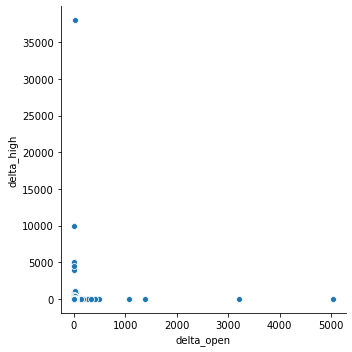

In [14]:
sns.relplot(x="delta_open", y="delta_high", data=df);

In [15]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,open,close,high,low,volume,delta_open,delta_high
count,1883203.00000,1883203.00000,1883203.00000,1883203.00000,1883203.00000,1883203.00000,1883203.00000
mean,68.14208,68.27674,68.82414,67.54027,16682861.88806,1.95702,0.54788
std,1689.78071,1695.06983,1699.96627,1683.60441,102634409.18204,6.15029,29.63947
min,0.01000,0.00000,0.01000,0.01000,0.00000,0.00000,0.00000
25%,3.96000,3.96000,4.00000,3.89000,18005.00000,0.00000,0.00000
50%,13.69000,13.70000,13.92000,13.45000,252656.00000,0.95694,0.04000
75%,36.70000,36.73000,37.14000,36.08000,4794013.50000,2.45902,0.29000
max,1297776.47000,1297776.47000,1297776.47000,1297776.47000,42983799660.00000,5028.20513,38000.00000


In [16]:
# ZOOM NOS NORMAIS
# sns.relplot(x="delta_open", y="delta_high", data=df.loc[df['delta_high'] < 1000])

In [17]:
df.loc[df['delta_high'] > 1000].head(100)

,datetime,ticker,open,close,high,low,volume,delta_open,delta_high
564,1994-07-07,ARN 4,175000.00,185000.00,190000.00,175000.00,86150.00,5.714286,5000.0
1702,1994-07-14,ARN 4,248000.00,210000.00,248000.00,206500.00,235548.00,15.322581,38000.0
2768,1994-07-21,ARN 4,235000.00,225000.00,235000.00,219999.99,73719.99,4.255319,10000.0
3410,1994-07-26,ANT 3,118000.00,114000.00,118000.00,108000.00,4359.99,3.389831,4000.0
3412,1994-07-26,ARN 4,245000.00,245000.00,250000.00,240000.00,832676.00,0.000000,5000.0
4109,1994-07-29,ARN 4,259500.00,255000.00,259500.00,255000.00,401280.00,1.734104,4500.0
531781,2004-05-20,AESL3,3999.99,2974.99,3999.99,2974.99,10974.97,25.625064,1025.0


## Usaremos dados depois de 95 por causa do plano real
Deltas extramamente altas levantaram a suspeita

In [18]:
df = df.loc[df['datetime'] > '1995-01-01']

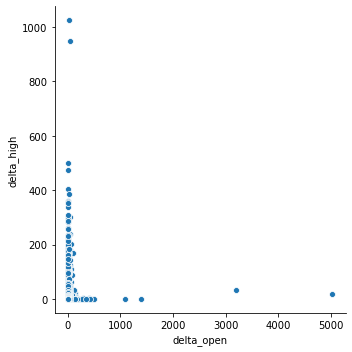

In [19]:
sns.relplot(x="delta_open", y="delta_high", data=df);

In [20]:
df.loc[df['delta_high'] > 6000].head(1)

,datetime,ticker,open,close,high,low,volume,delta_open,delta_high


### vamos recortar essa observação que esta extremamente descolada

In [21]:
df = df.loc[df['delta_high'] < 6999]

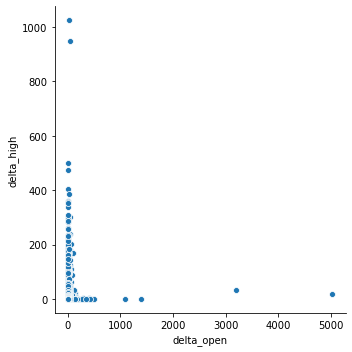

In [22]:
sns.relplot(x="delta_open", y="delta_high", data=df)

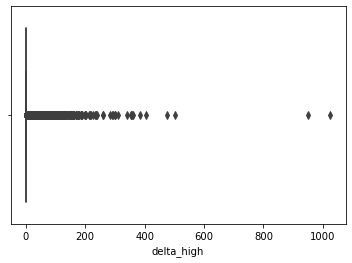

In [23]:
sns.boxplot(x=df['delta_high'])

In [24]:
df.loc[df['delta_high'] > 600].head(10)

,datetime,ticker,open,close,high,low,volume,delta_open,delta_high
40099,1995-02-23,MTB 3,2930.00,2000.00,2950.00,2000.00,43380.00,31.740614,950.0
531781,2004-05-20,AESL3,3999.99,2974.99,3999.99,2974.99,10974.97,25.625064,1025.0


## Vamos usar apenas dados desse seculo
nao conseguimos achar esssas acoes antigas

In [25]:
df = df.loc[df['datetime'] > '2000-01-01']

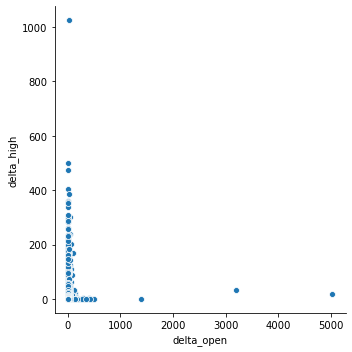

In [26]:
sns.relplot(x="delta_open", y="delta_high", data=df)

In [27]:
df.loc[df['delta_high'] > 600].head(10)

,datetime,ticker,open,close,high,low,volume,delta_open,delta_high
531781,2004-05-20,AESL3,3999.99,2974.99,3999.99,2974.99,10974.97,25.625064,1025.0


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


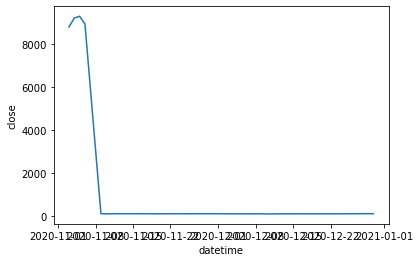

In [28]:
sns.lineplot(x='datetime', y='close', data=df.loc[(df['ticker'] == 'AMZO34') & (df['datetime'] > '2020-11-01') & (df['datetime'] > '2020-11-01')])

In [29]:
df.loc[(df['ticker'] == 'AMZO34') & (df['datetime'] > '2020-11-01') & (df['datetime'] > '2020-11-01')]

,datetime,ticker,open,close,high,low,volume,delta_open,delta_high
1854244,2020-11-03,AMZO34,8638.99,8779.45,8840.00,8444.44,14952140.22,1.625885,60.55
1854245,2020-11-04,AMZO34,8951.00,9194.65,9194.65,8951.00,9608634.26,2.722042,0.00
1854246,2020-11-05,AMZO34,9207.00,9280.00,9350.00,9164.90,7387944.57,0.792875,70.00
1854247,2020-11-06,AMZO34,9280.00,8926.50,9280.00,8870.00,12508258.30,3.809267,353.50
1854248,2020-11-09,AMZO34,113.71,108.81,117.95,105.96,29284445.04,4.309208,9.14
1854249,2020-11-10,AMZO34,106.08,105.47,107.27,103.30,30493277.04,0.575038,1.80
1859273,2020-11-11,AMZO34,106.29,107.55,108.05,104.85,20231314.93,1.185436,0.50
1859274,2020-11-12,AMZO34,107.92,108.60,109.61,107.15,12690454.53,0.630096,1.01
1859275,2020-11-13,AMZO34,108.66,108.88,110.11,107.78,11766562.93,0.202466,1.23
1859276,2020-11-16,AMZO34,107.32,108.88,109.06,106.02,9451368.82,1.453597,0.18


### Seriam esses dois dados ruido?

In [30]:
df.loc[df['delta_open'] > 10].head(10)

,datetime,ticker,open,close,high,low,volume,delta_open,delta_high
306866,2000-01-04,TRPL4,6.24,5.45,6.24,5.45,2023269.00,12.660256,0.79
306882,2000-01-05,TRPL4,5.51,6.19,6.19,5.20,1121662.00,12.341198,0.00
306883,2000-01-05,TRPL3,4.16,4.60,4.60,4.00,161235.00,10.576923,0.00
306998,2000-01-14,BBDC3,11.40,12.60,12.60,11.40,4971887.00,10.526316,0.00
307007,2000-01-12,SCAR3,4.85,4.00,4.85,4.00,885.00,17.525773,0.85
307034,2000-01-13,TCSL4,6.20,6.85,6.85,6.15,45155325.00,10.483871,0.00
307069,2000-01-17,CRTP5,411.00,470.00,474.00,411.00,3644079.65,14.355231,4.00
307165,2000-01-20,CHAP4,0.14,0.12,0.14,0.12,313127.00,14.285714,0.02
307236,2000-01-21,REAL3,1.20,1.00,1.20,1.00,19600.00,16.666667,0.20
307246,2000-01-21,TNEP3,3.11,3.49,3.50,3.10,451448.00,12.218650,0.01


### resolvemos tirar o delta_high pois nao traz informação util

In [31]:
df = df.drop(['delta_high', 'volume'], axis=1)

### LOF

In [32]:
def get_LOF_scores(df, n_neighbors=10, contamination=0.05):
    np.random.seed(42)

    # fit the model for outlier detection (default)
    clf = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    # use fit_predict to compute the predicted labels of the training samples
    # (when LOF is used for outlier detection, the estimator has no predict,
    # decision_function and score_samples methods).
    y_pred = clf.fit_predict(df)

    X_scores = clf.negative_outlier_factor_
    
    df['LOF_score'] = X_scores
    df['LOF_predictions'] = y_pred
    
    return df

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

df_test = df.drop(['datetime', 'ticker', 'low', 'high'], axis=1)
df_test = pd.DataFrame(
                  MinMaxScaler().fit_transform(df_test), 
                  index = df_test.index, 
                  columns=df_test.columns)

scores = get_LOF_scores(df_test, n_neighbors=10, contamination=0.3)

In [ ]:
def show_2D_outliers(df, x, y, scores, title = ''):

    normalized = (df[scores].max() - df[scores]) / (df[scores].max() - df[scores].min())
    
    t = "Outlier Scores"
    if title: t=t+": "+title
    
    fig, ax = plt.subplots(figsize=(8, 6))

    plt.title(t)
    plt.scatter(x=x, y=y, color='k', s=3., label='Data points', data=df)
    # plot circles with radius proportional to the outlier scores

    plt.scatter(x=x, y=y, s=1000 * normalized, edgecolors='r',
                facecolors='none', label='Outlier scores', data=df)
    plt.axis('tight')
    # plt.xlim((-5, 5))
    # plt.ylim((-5, 5))
    # plt.xlabel("prediction errors: %d" % (n_errors))
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.show()

In [ ]:
show_2D_outliers(scores, x = 'open', y = 'delta_open', scores = 'LOF_score', title = 'Dia Semana')

In [ ]:
scores